# Домашнее задание 2 

### Подготовка данных

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
import os
import pandas as pd

In [3]:
folder_name_train_neg = 'C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\train\\neg\\'
folder_name_train_pos = 'C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\train\\pos\\'

In [4]:
folder_name_test_neg = 'C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\test\\neg\\'
folder_name_test_pos = 'C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\test\\pos\\'

In [5]:
data, labels = [], []
for file in os.listdir('C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\train\\neg\\'):
        with open(folder_name_train_neg + file, 'r', encoding='utf-8') as f:
            review = f.read().replace('\n', '')
            data.append(review)
            labels.append(0)

In [6]:
for file in os.listdir('C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\train\\pos\\'):
        with open(folder_name_train_pos + file, 'r', encoding='utf-8') as f:
            review = f.read().replace('\n', '')
            data.append(review)
            labels.append(1)

In [7]:
data_test, labels_test = [], []
for file in os.listdir('C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\test\\neg\\'):
        with open(folder_name_test_neg + file, 'r', encoding='utf-8') as f:
            review = f.read().replace('\n', '')
            data_test.append(review)
            labels_test.append(0)

In [8]:
for file in os.listdir('C:\\Users\\User\\Desktop\\python files\\machine learning\\homework\\2\\aclImdb\\test\\pos\\'):
        with open(folder_name_test_pos + file, 'r', encoding='utf-8') as f:
            review = f.read().replace('\n', '')
            data_test.append(review)
            labels_test.append(1)

In [9]:
df_train = pd.DataFrame(
    {'review':data,
     'label':labels
    })

In [10]:
df_test = pd.DataFrame(
    {'review':data_test,
     'label':labels_test
    })

In [16]:
count_vect = CountVectorizer()

In [17]:
X_train = count_vect.fit_transform(df_train.review)

In [18]:
X_train.shape

(25000, 74849)

In [19]:
X_test = count_vect.transform(df_test.review)

In [20]:
X_test.shape

(25000, 74849)

### KNeighborsClassifier


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier().fit(X_train, df_train.label)

In [24]:
predicted = clf.predict(X_test)

In [25]:
acc = accuracy_score(predicted, df_test.label)
micro_f1 = f1_score(predicted, df_test.label, average = 'micro')
micro_p = precision_score(predicted, df_test.label, average = 'micro')
micro_r = recall_score(predicted, df_test.label, average = 'micro')
macro_f1 = f1_score(predicted, df_test.label, average = 'macro')
macro_p = precision_score(predicted, df_test.label, average = 'macro')
macro_r = recall_score(predicted, df_test.label, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6244
micro F1=0.6244, micro P=0.6244, micro R=0.6244
macro F1=0.6225, macro P=0.6244, macro R=0.6269



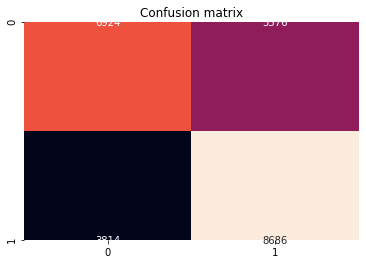

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data=confusion_matrix(df_test.label, predicted), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.show()

In [28]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

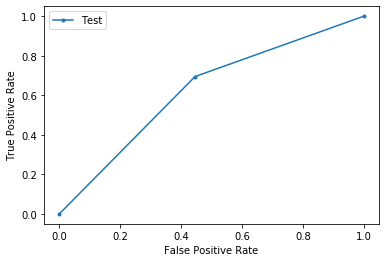

In [43]:
y_true = df_test.label 
y_predicted = predicted 
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [44]:
print(roc_auc_score(y_true, y_predicted))

0.6244


### Метод наивного Байеса [Multinomial naive Bayes classifier]

In [32]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, df_train.label)
predicted2 = clf2.predict(X_test)

In [33]:
acc = accuracy_score(predicted2, df_test.label)
micro_f1 = f1_score(predicted2, df_test.label, average = 'micro')
micro_p = precision_score(predicted2, df_test.label, average = 'micro')
micro_r = recall_score(predicted2, df_test.label, average = 'micro')
macro_f1 = f1_score(predicted2, df_test.label, average = 'macro')
macro_p = precision_score(predicted2, df_test.label, average = 'macro')
macro_r = recall_score(predicted2, df_test.label, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8136
micro F1=0.8136, micro P=0.8136, micro R=0.8136
macro F1=0.8128, macro P=0.8136, macro R=0.8190



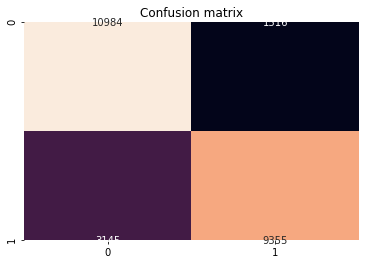

In [37]:
sns.heatmap(data=confusion_matrix(df_test.label, predicted2), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.show()

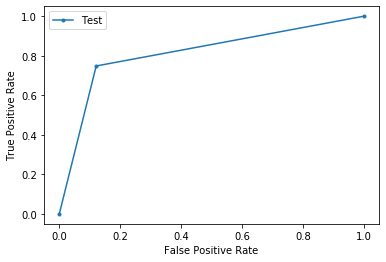

In [45]:
y_true = df_test.label 
y_predicted = predicted2 
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [46]:
print(roc_auc_score(y_true, y_predicted))

0.81356


### Логистическая регрессия

In [35]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression().fit(X_train, df_train.label)
predicted3 = clf3.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
acc = accuracy_score(predicted3, df_test.label)
micro_f1 = f1_score(predicted3, df_test.label, average = 'micro')
micro_p = precision_score(predicted3, df_test.label, average = 'micro')
micro_r = recall_score(predicted3, df_test.label, average = 'micro')
macro_f1 = f1_score(predicted3, df_test.label, average = 'macro')
macro_p = precision_score(predicted3, df_test.label, average = 'macro')
macro_r = recall_score(predicted3, df_test.label, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8668
micro F1=0.8668, micro P=0.8668, micro R=0.8668
macro F1=0.8668, macro P=0.8668, macro R=0.8669



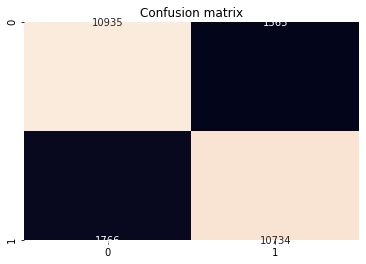

In [38]:
sns.heatmap(data=confusion_matrix(df_test.label, predicted3), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.show()

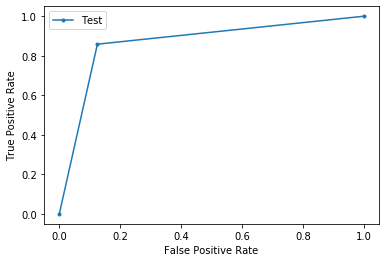

In [47]:
y_true = df_test.label 
y_predicted = predicted3 
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [48]:
print(roc_auc_score(y_true, y_predicted))

0.86676


### Вывод:

Лучшей моделью оказалась логистическая регрессия. Она показала лучший процент правдивых прогнозов и сработала несколько быстрее, чем другие классификаторы.

### 15 самых негативных и самых позитивных рецензий модели

In [162]:
probabilities = clf3.predict_proba(X_test)[:,1]

In [184]:
most_neg = probabilities.argsort()[:15]

In [200]:
for rev in most_neg:
    print(df_test.review[rev] + '\n')

Snake Island is one of those films that, whilst one sits and watches its amazing level of stupidity, makes one wish the film camera had never been invented. The real reason why Plan 9 From Outer Space will hold onto its honoured title of Worst Film Of All Time for a while to come is not so much because of how bad it is. It is because of the fact that it is the most entertaining bad film you will ever see. Snake Island is the other kind of bad. Snake Island is just so bad that it is excruciating. A stupid premise combines with a script that was written by monkeys tapping one-key typewriters onto transparencies that were then overlapped in order to resemble dialogue to make the most obvious problems here. Filmed entirely on location in South Africa, the environments in which the film takes place are about the only element that can truthfully be considered well-realised. Many shots involving snakes consist of close-ups so surreal in appearance that one begins to wonder whether said snakes

In [201]:
most_pos = probabilities.argsort()[-16:-1]

In [202]:
for rev in most_pos:
    print(df_test.review[rev] + '\n')

Hayao Miyazaki's latest and eighth film for Studio Ghibili, "Gake No Ue No Ponyo" (Ponyo on the Cliff by the Sea) is a wonderfully fun and imaginative look at childhood. At a time when it seems that film animation has been dominated by Disney/Pixar's CGI masterpieces, it is both refreshing and comforting to know that Miyazaki is still relying on traditional hand-drawn animation to tell his charming and enchanting stories. <br /><br />The story revolves around the friendship between a magical sea sprite/goldfish and the human child that she encounters during a curious outing to see the human world. The human child, Sosuke (Doi Hiroki) lives in a small house on a cliff overlooking a small port city in Southern Japan (based on Seto Island) where he lives with his young mom, Lisa (Yamaguchi Tomoko). Sosuke names the strange goldfish "Ponyo" and takes it to the daycare/nursing center that Lisa works at. Ponyo is definitely not your typical goldfish and soon begins to adapt and take on human

### Функция подсчета точности, полноты и F-меры

In [54]:
def count_metrics(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    
    PR = TP/(TP+FP)
    R = TP/(TP+FN)
    F = (2*PR*R)/(PR+R)

    print('True positive: ', TP)
    print('False positive: ', FP)
    print('True negative: ', TN)
    print('False negative: ', FN)
    print('Precision: ', PR)
    print('Recall: ', R)
    print('F-score: ', F)
    

In [55]:
count_metrics(df_test.label, predicted3)

True positive:  10734
False positive:  1565
True negative:  10935
False negative:  1766
Precision:  0.8727538824294658
Recall:  0.85872
F-score:  0.8656800677446672
